# CWM1-Steinschlagrisiko
<p>Datum: 13.01.23</p>
<p>Autoren: Logan Henchoz, Noah Recher, Kevin Wartmann, Arian Iseni</p>

## Einleitung


## Systemdefinition

## Lösungsstrategie

### Explorative Datenanalyse

#### Module importieren

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
from scipy import stats
import statsmodels.api as sm

#### Daten laden und säubern

In [37]:
def open_csv_to_df(directory):

    # CSV-Datei einlesen
    df = pd.read_csv(directory)

    # Spalten befüllen und neu beschriften
    df = df.iloc[0:,:4]
    df.columns = ["Date", "Time", "Mass_(kg)", "Velocity_(m/s)"]

    # Nach Datum sortieren
    df = df.sort_values(['Date', 'Time']).reset_index(drop=True)

    # NAs löschen
    df = df.dropna()

    # Datum und Zeit in einer Spalte zusammenfügen
    for i in range(len(df)):
        date_raw = df.iloc[i,:].Date + " " +df.iloc[i,:].Time
        date1 = datetime.strptime(date_raw, '%Y-%m-%d %H:%M')
        df.iloc[i,0] = date1

    # Zeit-Spalten bereinigen
    df.rename(columns = {'Date':'Datetime'}, inplace=True)

    return df

In [38]:
df_area1 = open_csv_to_df("./out_1.csv")
df_area1

,Datetime,Time,Mass_(kg),Velocity_(m/s)
0,2019-01-01 09:00:00,09:00,194.0,8.4
1,2019-01-01 21:00:00,21:00,224.0,8.8
2,2019-01-02 14:00:00,14:00,3104.0,9.2
3,2019-01-04 15:00:00,15:00,228.0,8.0
4,2019-01-05 23:00:00,23:00,755.0,7.0
...,...,...,...,...
63,2019-03-18 16:00:00,16:00,167.0,8.9
64,2019-03-22 18:00:00,18:00,2847.0,7.0
65,2019-03-26 00:00:00,00:00,44.0,8.9
66,2019-03-26 06:00:00,06:00,45.0,8.4


In [39]:
df_area2 = open_csv_to_df("./out_2.csv")
df_area2

,Datetime,Time,Mass_(kg),Velocity_(m/s)
0,2019-01-01 09:00:00,09:00,38.0,45.4
1,2019-01-03 06:00:00,06:00,187.0,41.6
2,2019-01-04 10:00:00,10:00,36.0,44.6
3,2019-01-07 14:00:00,14:00,6.0,41.2
4,2019-01-11 06:00:00,06:00,65.0,39.6
5,2019-01-11 16:00:00,16:00,58.0,33.2
6,2019-01-14 11:00:00,11:00,365.0,40.2
7,2019-01-16 02:00:00,02:00,22.0,46.5
8,2019-01-18 06:00:00,06:00,146.0,36.2
9,2019-01-19 17:00:00,17:00,29.0,38.3


#### Zeitabstände berechnen

In [40]:
def calc_time_delta(df):

    # Neue Spalte erstellen
    df.insert(3, "Time_delta_(h)", "")

    # Zeitabstand berechnen
    for i in range(len(df)-1):
        date1 = df.iloc[i,0]
        date2 = df.iloc[i+1,0]
        time_delta = date2 - date1
        time_delta = (time_delta.days*24) + (time_delta.seconds//3600)
        df.iloc[i+1,3] = time_delta

    # Erster Eintrag mit Null ersetzen
    df.iloc[0,3] = 0

    # Datentyp zu Integer ändern
    df['Time_delta_(h)'] = df['Time_delta_(h)'].astype('int')

    return df

In [41]:
df_area1 = calc_time_delta(df_area1)
df_area1

,Datetime,Time,Mass_(kg),Time_delta_(h),Velocity_(m/s)
0,2019-01-01 09:00:00,09:00,194.0,0,8.4
1,2019-01-01 21:00:00,21:00,224.0,12,8.8
2,2019-01-02 14:00:00,14:00,3104.0,17,9.2
3,2019-01-04 15:00:00,15:00,228.0,49,8.0
4,2019-01-05 23:00:00,23:00,755.0,32,7.0
...,...,...,...,...,...
63,2019-03-18 16:00:00,16:00,167.0,28,8.9
64,2019-03-22 18:00:00,18:00,2847.0,98,7.0
65,2019-03-26 00:00:00,00:00,44.0,78,8.9
66,2019-03-26 06:00:00,06:00,45.0,6,8.4


In [42]:
df_area2 = calc_time_delta(df_area2)
df_area2

,Datetime,Time,Mass_(kg),Time_delta_(h),Velocity_(m/s)
0,2019-01-01 09:00:00,09:00,38.0,0,45.4
1,2019-01-03 06:00:00,06:00,187.0,45,41.6
2,2019-01-04 10:00:00,10:00,36.0,28,44.6
3,2019-01-07 14:00:00,14:00,6.0,76,41.2
4,2019-01-11 06:00:00,06:00,65.0,88,39.6
5,2019-01-11 16:00:00,16:00,58.0,10,33.2
6,2019-01-14 11:00:00,11:00,365.0,67,40.2
7,2019-01-16 02:00:00,02:00,22.0,39,46.5
8,2019-01-18 06:00:00,06:00,146.0,52,36.2
9,2019-01-19 17:00:00,17:00,29.0,35,38.3


#### Vergleich der beiden Zonen

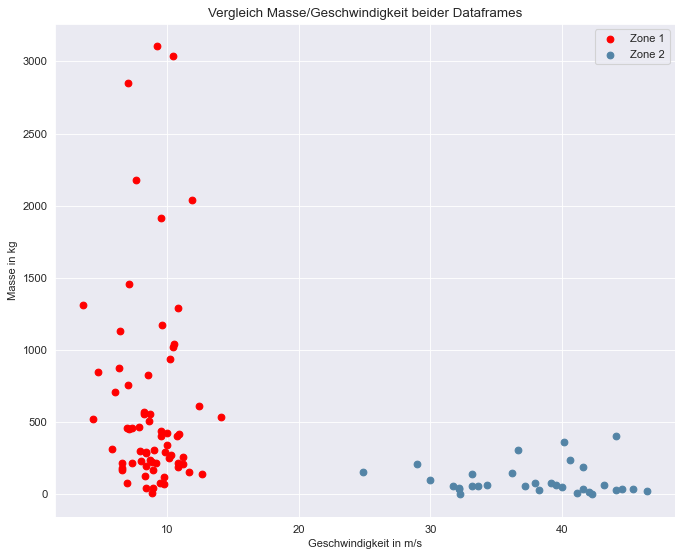

In [43]:
plt.figure(figsize=(10, 8), dpi=80)
plt.title("Vergleich Masse/Geschwindigkeit beider Dataframes")
plt.xlabel("Geschwindigkeit in m/s")
plt.ylabel("Masse in kg")
plt.scatter(x = df_area1["Velocity_(m/s)"],y = df_area1["Mass_(kg)"], color = "red", label = "Zone 1")
plt.scatter(x = df_area2["Velocity_(m/s)"],y = df_area2["Mass_(kg)"], color = '#5384A6', label = "Zone 2")
plt.legend(loc='upper right')
plt.show()

#### Abhängigkeit von Tageszeit und Steinschlag

In [44]:
def plot_incidents_over_time(df, zone):
    plt.hist(df["Time"], color='#5384A6', bins = 20)
    plt.xticks(rotation=90)
    plt.xlabel("Uhrzeit")
    plt.ylabel("Anzahl")
    plt.title("Verteilung der Steinschläge nach Uhrzeit in {}".format(zone))
    plt.show()

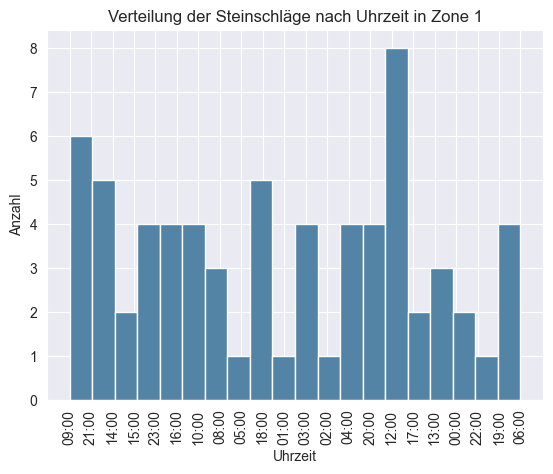

In [45]:
plot_incidents_over_time(df_area1, "Zone 1")

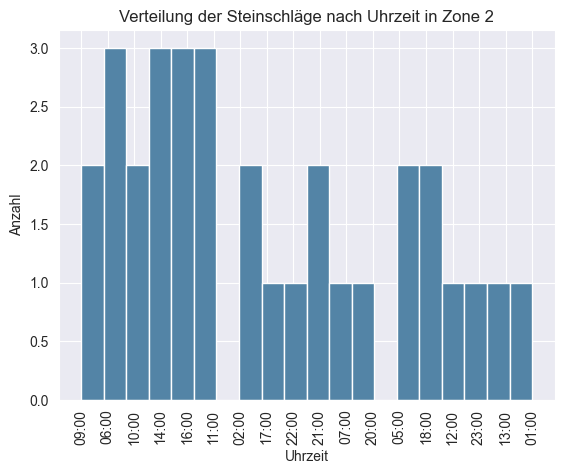

In [46]:
plot_incidents_over_time(df_area2, "Zone 2")

#### Visualisierung der Verteilung von Zufallsvariablen

In [47]:
# Histrogramm erstellen
def plot_histogram(data):
    plt.hist(data, bins=30, color='#5384A6')
    plt.xlim([data.min(), data.max()])
    plt.xlabel(data.head().name)
    plt.ylabel('Anzahl')
    plt.title('Histrogramm von ' + data.head().name)

##### Zone 1

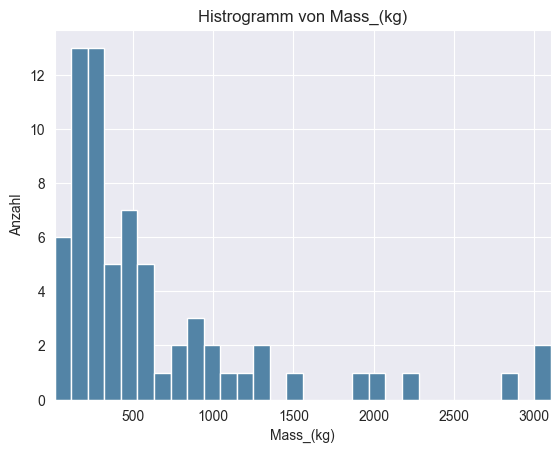

In [48]:
plot_histogram(df_area1["Mass_(kg)"])

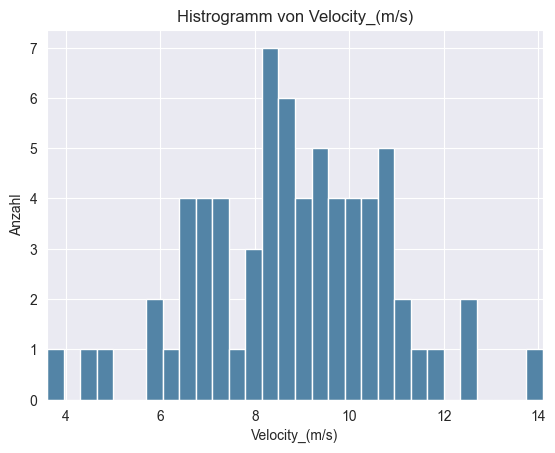

In [49]:
plot_histogram(df_area1["Velocity_(m/s)"])

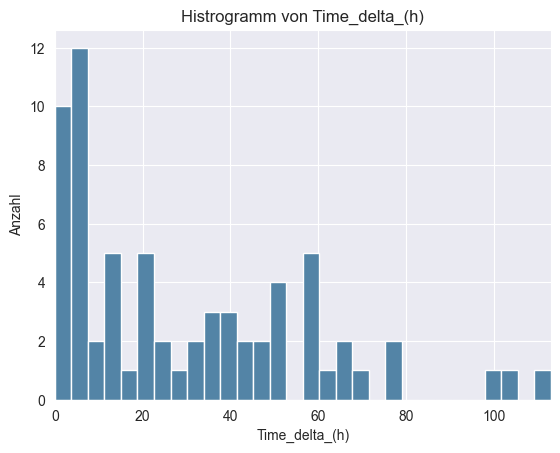

In [50]:
plot_histogram(df_area1["Time_delta_(h)"])

##### Zone 2

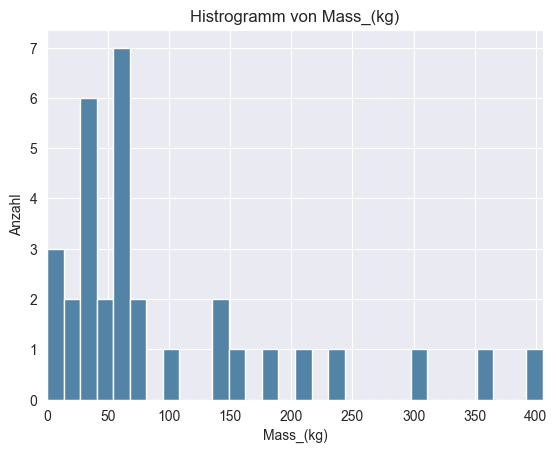

In [51]:
plot_histogram(df_area2["Mass_(kg)"])

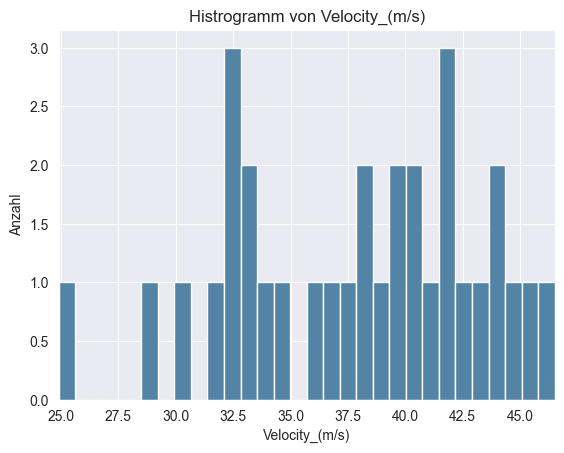

In [52]:
plot_histogram(df_area2["Velocity_(m/s)"])

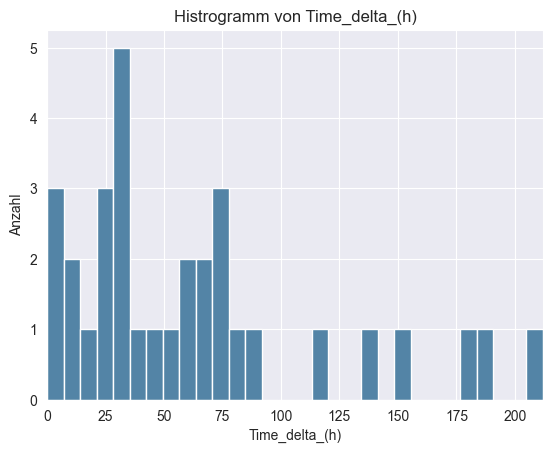

In [53]:
plot_histogram(df_area2["Time_delta_(h)"])

### Verteilungsfunktionen bestimmen

In [54]:
def fit(data):
    # Verteilungsfunktionen definieren
    distributions = ['norm', 'expon', 'lognorm','gamma', 'cauchy']

    # Werte gleichmässig auf X-Achse verteilen
    x = np.linspace(min(data), max(data), 1_000)

    # ECDF von den definierten Verteilungsfunktionen erstellen
    for distribution in distributions:
        param = eval('stats.' + distribution + '.fit(data)')
        sample = eval('stats.' + distribution + '.cdf(x, *param)')
        plt.plot(x, sample)

    # ECDF ploten
    plt.hist(data, cumulative=True, density=True, bins=200, color='#5384A6')
    plt.xlim([data.min(), data.max()])
    plt.xlabel(data.head().name)
    plt.ylabel('F(x)')
    plt.legend(distributions, loc='lower right')
    plt.title('Empirische kumulative Verteilungsfunktion von ' + data.head().name)

    # QQ-Plots für die Verteilungsfunktionen erstellen und ploten
    count = 0
    fig, ax = plt.subplots(1, len(distributions), figsize=(25, 5))
    fig.suptitle('Quantil-Quantil Plots der angepassten Verteilungsfunktionen und ' + data.head().name, fontsize=16)

    for distribution in distributions:
        param = eval('stats.' + distribution + '.fit(data)')
        sample = eval('stats.' + distribution + '.rvs(*param, size = 10000)')
        sm.qqplot_2samples(data, sample, xlabel=distribution.capitalize() + ' Verteilung', ylabel='Probe Verteilung', line='45', ax=ax[count])
        count += 1

#### Zone 1
##### Masse

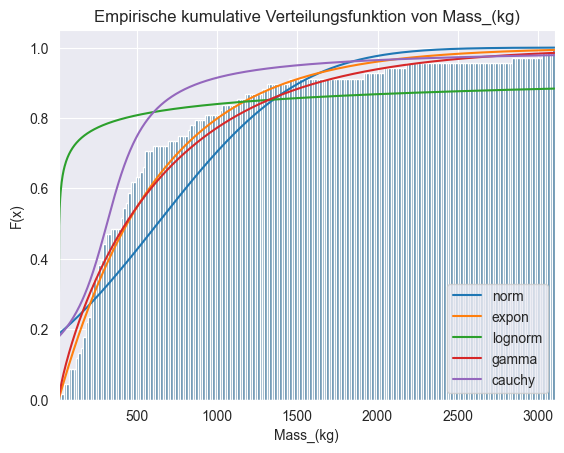

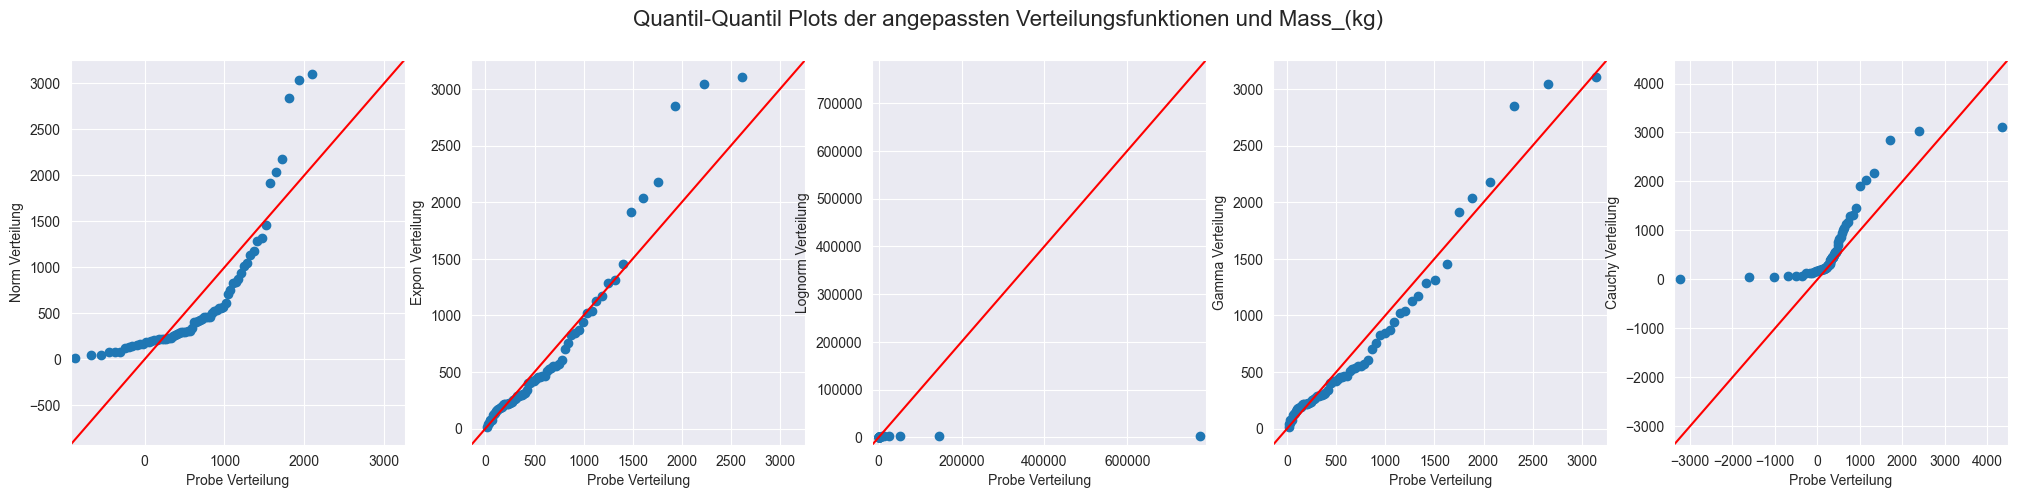

In [55]:
fit(df_area1['Mass_(kg)'])

##### Geschwindigkeit

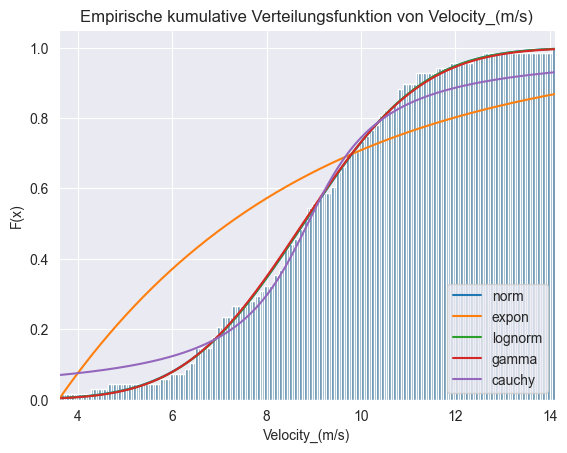

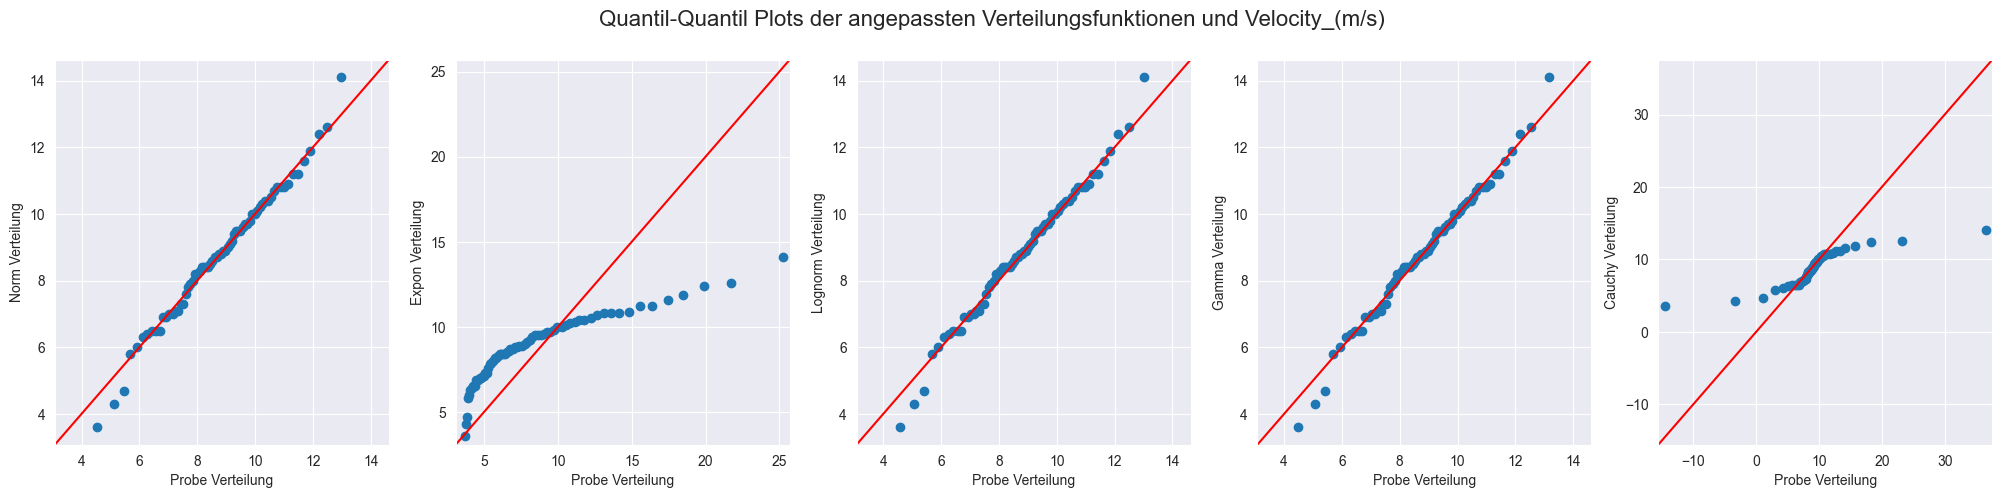

In [56]:
fit(df_area1["Velocity_(m/s)"])

##### Zeitabstand

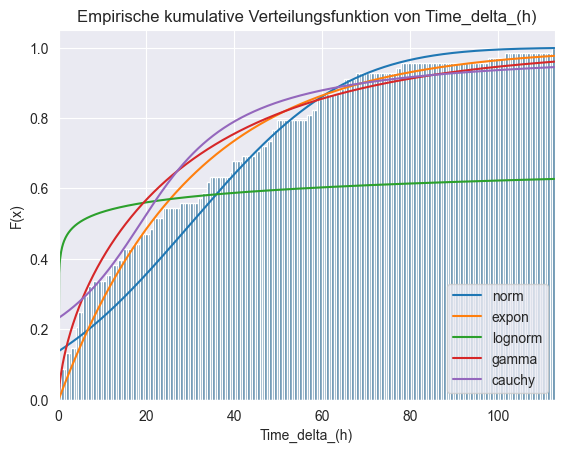

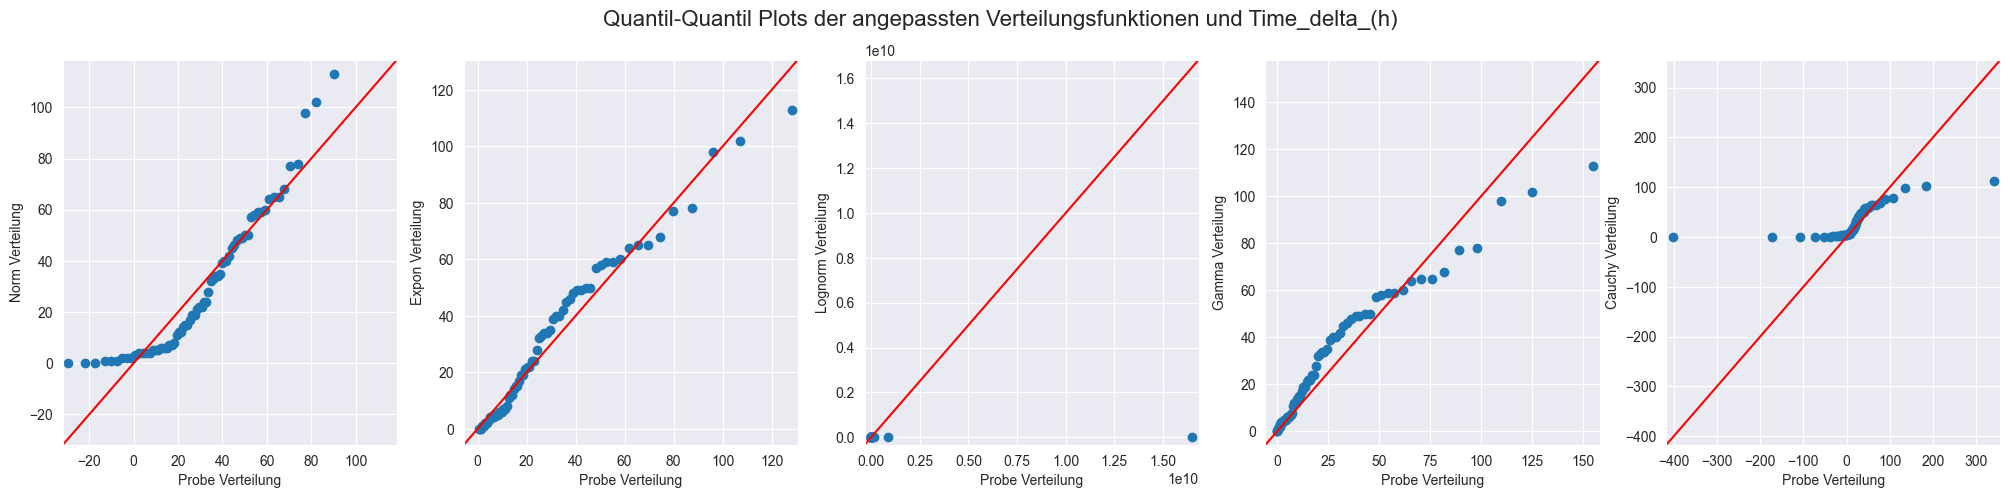

In [57]:
fit(df_area1["Time_delta_(h)"])

#### Zone 2
##### Masse

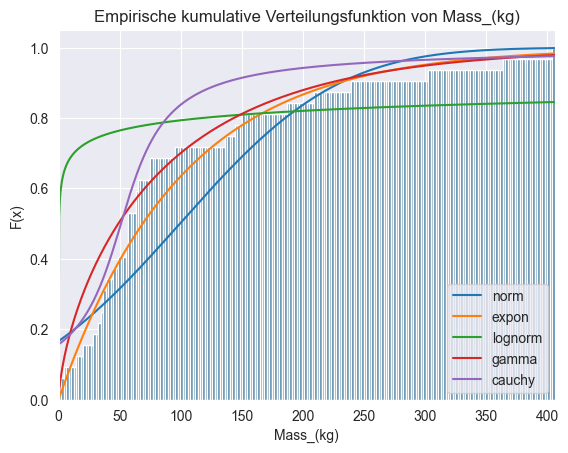

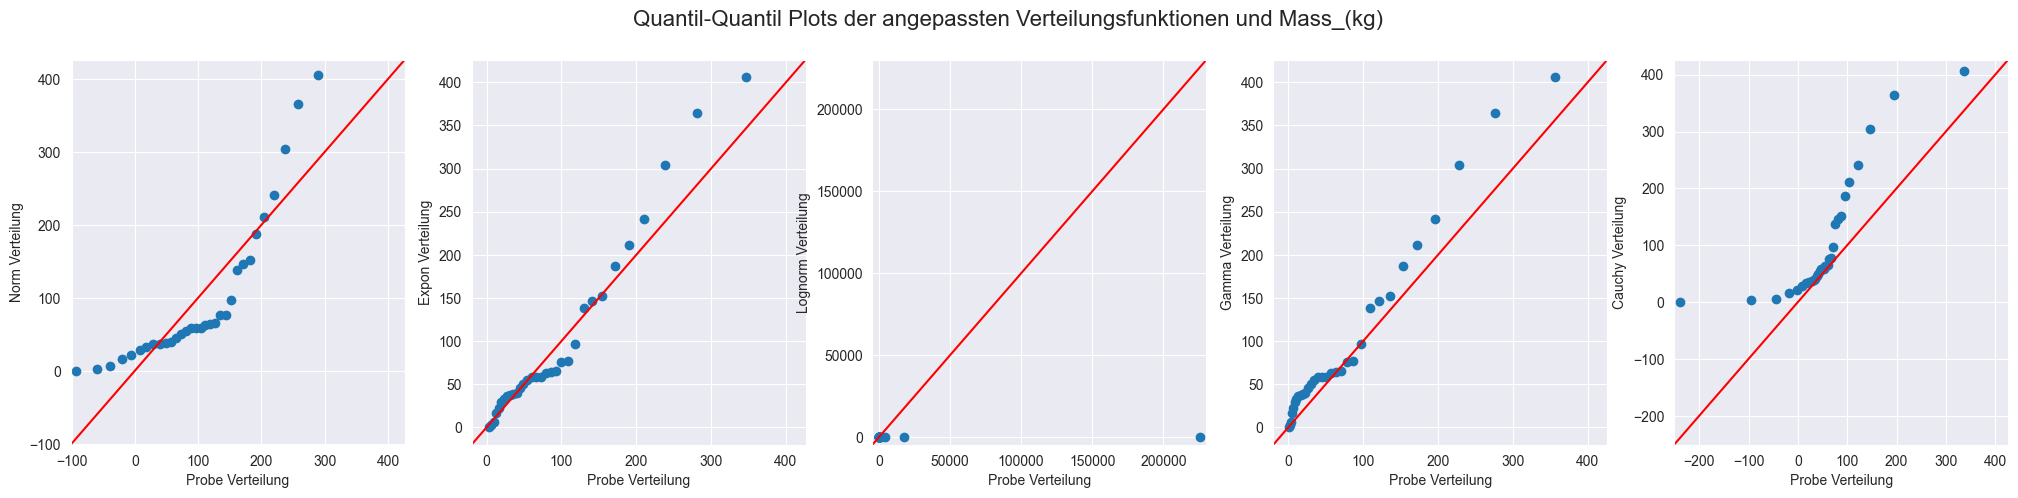

In [58]:
fit(df_area2['Mass_(kg)'])

##### Geschwindigkeit

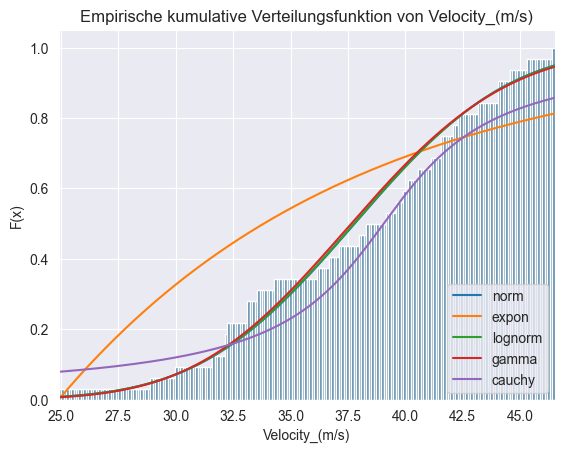

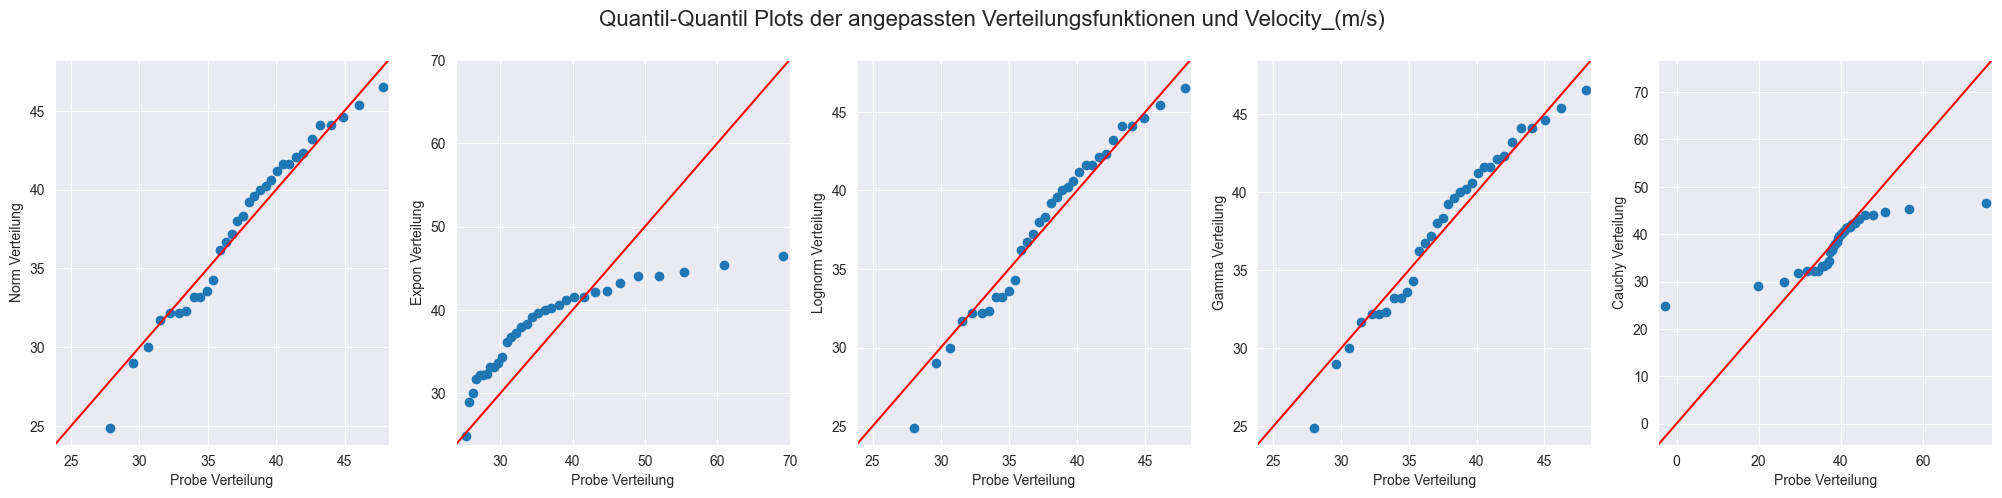

In [59]:
fit(df_area2["Velocity_(m/s)"])

##### Zeitabstand

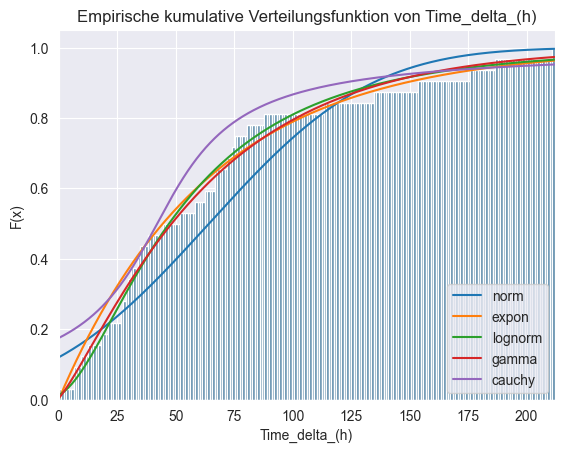

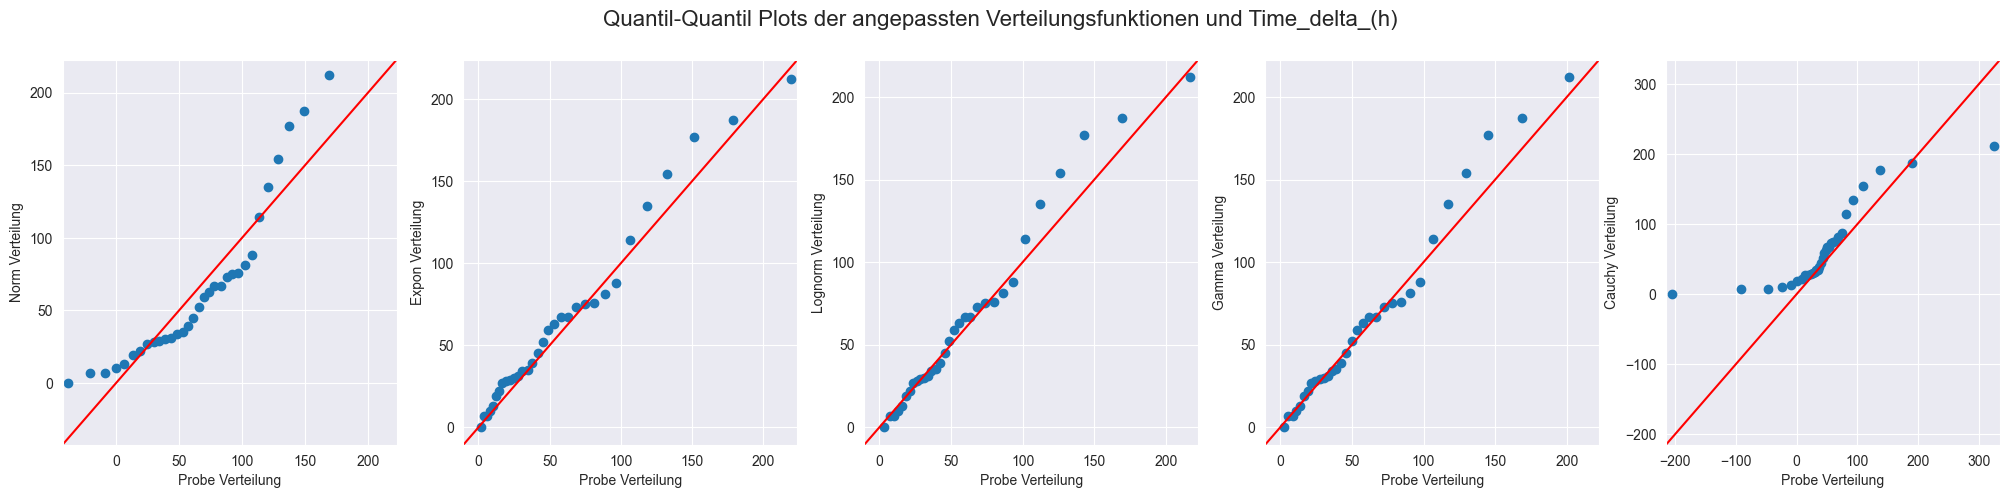

In [60]:
fit(df_area2["Time_delta_(h)"])

## Wahrscheinlichkeitsmodell

### Monte Carlo Simulation

In [61]:
# Anzahl Simulationen
sim_count = 1_000_000

#### Zone 1

In [62]:
# Masse
param = stats.gamma.fit(df_area1['Mass_(kg)'])
zone1_mass = stats.gamma.rvs(*param, size = sim_count)

# Geschwindigkeit
param = stats.norm.fit(df_area1["Velocity_(m/s)"])
zone1_velocity = stats.norm.rvs(*param, size = sim_count)

# Zeitabstand
param = stats.expon.fit(df_area1["Time_delta_(h)"])
zone1_time_delta = stats.expon.rvs(*param, size = sim_count)

#### Zone 2

In [63]:
# Masse
param = stats.gamma.fit(df_area2['Mass_(kg)'])
zone2_mass = stats.gamma.rvs(*param, size = sim_count)

# Geschwindigkeit
param = stats.norm.fit(df_area2["Velocity_(m/s)"])
zone2_velocity = stats.norm.rvs(*param, size = sim_count)

# Zeitabstand
param = stats.expon.fit(df_area2["Time_delta_(h)"])
zone2_time_delta = stats.expon.rvs(*param, size = sim_count)

### Simulierte Zufallsvariablen zusammenfügen

#### Zone 1

In [64]:
# Dataframe erstellen
df_area1_sim = pd.DataFrame()

# Simulierte Zufallsvariable einfügen
df_area1_sim.insert(0, "Mass_(kg)", zone1_mass)
df_area1_sim.insert(1, "Velocity_(m/s)", zone1_velocity)
df_area1_sim.insert(2, "Energy_(kJ)", "")
df_area1_sim.insert(3, "Time_delta_(h)", zone1_time_delta)

# Energie berechnen
df_area1_sim["Energy_(kJ)"] = (0.5 * df_area1_sim["Mass_(kg)"] * (df_area1_sim["Velocity_(m/s)"] ** 2)) / 1000

# Zeitabstände auf 2 Stellen nach dem Komma runden
df_area1_sim["Time_delta_(h)"] = zone1_time_delta.round(2)

# Erster Eintrag gleich Null setzen
df_area1_sim["Time_delta_(h)"][0] = 0

df_area1_sim

,Mass_(kg),Velocity_(m/s),Energy_(kJ),Time_delta_(h)
0,516.725337,6.408505,10.610680,0.00
1,304.018132,10.159634,15.690097,38.54
2,176.474031,9.953355,8.741578,8.05
3,628.157953,7.403205,17.213865,55.47
4,574.869615,8.134286,19.018588,28.46
...,...,...,...,...
999995,82.311543,10.230434,4.307437,4.28
999996,35.570817,8.293925,1.223444,134.37
999997,2106.729682,8.035432,68.013833,55.95
999998,1698.525280,11.079992,104.260769,40.75


#### Zone 2

In [65]:
# Dataframe erstellen
df_area2_sim = pd.DataFrame()

# Simulierte Zufallsvariable einfügen
df_area2_sim.insert(0, "Mass_(kg)", zone2_mass)
df_area2_sim.insert(1, "Velocity_(m/s)", zone2_velocity)
df_area2_sim.insert(2, "Energy_(kJ)", "")
df_area2_sim.insert(3, "Time_delta_(h)", zone2_time_delta)

# Energie berechnen
df_area2_sim["Energy_(kJ)"] = (0.5 * df_area2_sim["Mass_(kg)"] * (df_area2_sim["Velocity_(m/s)"] ** 2)) / 1000

# Zeitabstände auf 2 Stellen nach dem Komma runden
df_area2_sim["Time_delta_(h)"] = zone2_time_delta.round(2)

# Erster Eintrag gleich Null setzen
df_area2_sim["Time_delta_(h)"][0] = 0

df_area2_sim

,Mass_(kg),Velocity_(m/s),Energy_(kJ),Time_delta_(h)
0,45.543672,32.059512,23.405174,0.00
1,40.392719,40.016770,32.341277,75.00
2,108.775334,46.065020,115.409873,67.57
3,48.409693,37.816616,34.615264,57.77
4,80.039311,37.119903,55.142570,68.37
...,...,...,...,...
999995,16.895075,37.814128,12.079204,52.90
999996,0.177554,44.385061,0.174894,27.84
999997,2.234136,38.504838,1.656190,6.21
999998,233.264417,31.744820,117.534195,157.64


#### Zonen zusammenfügen

In [66]:
df_sim = pd.concat([df_area1_sim,df_area2_sim])
df_sim = df_sim.sample(frac=1,ignore_index=True)

### Berechnung der Netzdurchbrüche
In diesem Abschnitt gehen wir über unsere simulierte Daten und berechnen wieviele Steine aus dem Netz brechen und somit auf die Strasse fallen.

In [67]:
def net_test(net_status, weight_in_net, impact_energy):

    # Wenn das Netz schon gerissen ist fällt der Stein
    if net_status == True:
        return True

    # Wenn mehr als 2000 kg im Netz liegen und die Aufprallenergie grösser als 500 kJ ist reisst das Netz
    elif weight_in_net > 2000:
        if impact_energy > 500:
            return True
        else:
            return False

    # Wenn weniger als 2000 kg im Netz liegen und die Aufprallenergie grösser als 1000 kJ ist reisst das Netz
    elif weight_in_net <= 2000:
        if impact_energy > 1000:
            return True
        else:
            return False

    # Falls nichts zutrifft ist das Netz noch unbeschädigt
    else:
        return False

In [68]:
time_interval = 24          # Im 24 Stunden Takt werden die Netze geprüft, entleert und ggf. repariert
current_delta = 0           # Start Zeitabstand setzen
hours_total = 0             # Total Anzahl Stunden, welche wir simulieren
weight_in_net = 0           # Masse welche sich im Netz befindet
net_status = False          # Status ob das Netz gerissen ist (False -> Nein)
incident = 0                # Anzahl Steine, welche auf die Strasse fallen
stones_in_net = 0           # Anzahl Steine, welche sich bereits im Netz befinden
sim_stones = len(df_sim)    # Anzahl simulierte Steine

for i in range(int(sim_stones)):
    iterated_delta = df_sim["Time_delta_(h)"][i]    # Zeit welche nach dem Letzten Stein vergangen ist
    iterated_energy = df_sim["Energy_(kJ)"][i]      # Energie des iterierten Elements

    hours_total += iterated_delta  # Bei jedem Durchgang werden die Stunden addiert

    # Wenn der Zeitabstand grösser als 24 Std. ist:
    if (iterated_delta > time_interval):

        # Falls das Netz bereits gerissen ist:
        if net_status:
            incident += stones_in_net

        stones_in_net = 1
        net_status = net_test(False,0,iterated_energy) # Wir testen, ob das Netz in diesem Fall bricht
        weight_in_net = df_sim["Mass_(kg)"][i]

        iterated_delta = iterated_delta % time_interval  #wir brechen das delta runter, auf alle Stunden welche nach 24 Std. Slots übrig bleiben würden, 36 Std. - 24 Std. = 12 Std.

        #Falls der Zeitabstand der übrig bleibt immernoch grösser als
        if iterated_delta > (time_interval - current_delta):

            current_delta = abs((time_interval - current_delta)-iterated_delta)


        elif iterated_delta <= (time_interval - current_delta):

            current_delta = current_delta + iterated_delta

    # Falls der Zeitabstand kleiner als 24h ist:
    elif iterated_delta <= time_interval:

        if iterated_delta > (time_interval - current_delta):
            if net_status:
                incident += stones_in_net
            stones_in_net = 1
            net_status = net_status(False,0,iterated_energy)
            weight_in_net = df_sim["Mass_(kg)"][i]
            current_delta = abs((time_interval - current_delta)-iterated_delta)

        elif iterated_delta <= (time_interval - current_delta):
            stones_in_net += 1
            net_status = net_status(net_status,weight_in_net,iterated_energy)
            weight_in_net += df_sim["Mass_(kg)"][i]
            current_delta = current_delta + iterated_delta



print("Anzahl simulierte Steine: ",sim_stones)
print("Anzahl incident Steine: ",incident)
print(incident/sim_stones*100)

TypeError: 'bool' object is not callable

## Ergebnis